In [121]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [122]:
#Load the dataset into a dataframe
df = pd.read_csv('/Users/martinmcelhinney/Documents/NCIRL/Machine Learning/CA1/breast-cancer-wisconsin.csv',
                 header=None)

#Insert Column names
df.columns = ['Sample code no.','Clump Thickness','Uniformity of Cell Size', 
'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

df = df.drop(['Sample code no.'], axis=1)

In [123]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [117]:
print('The number of Columns in the dataframe are: ', (df.shape[1]))
print('The number of Rows in the Dataframe are: ', (df.shape[0]))

The number of Columns in the dataframe are:  10
The number of Rows in the Dataframe are:  699


In [118]:
#Are there any missing valuers in the dataset?

if df.isna().sum().sum() >0:
    print('There are NaN values in the dataset')
    

In [119]:
#Identify any missing values in the dataframe

df = df.replace('?',np.NaN)
print('The number of missing values (NaNs) in each column are: ')
for col in df.columns:
    print('/t%s: %d' % (col,df[col].isna().sum()))

The number of missing values (NaNs) in each column are: 
/tClump Thickness: 0
/tUniformity of Cell Size: 0
/tUniformity of Cell Shape: 0
/tMarginal Adhesion: 0
/tSingle Epithelial Cell Size: 0
/tBare Nuclei: 16
/tBland Chromatin: 0
/tNormal Nucleoli: 0
/tMitoses: 0
/tClass: 0


Text(0.5, 1.0, 'Heatmap Illustrating Missing Values in the Dataset')

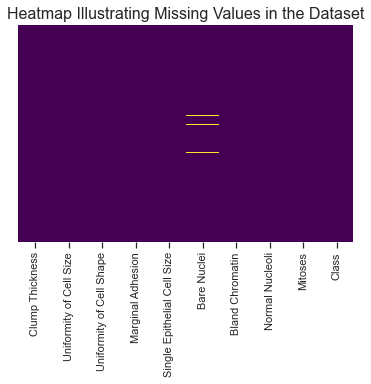

In [120]:
#Visualise the missing values iin a heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.title("Heatmap Illustrating Missing Values in the Dataset", fontsize=16)

In [82]:
#Replace any missing values in the dataframe using the median strategy

imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(df[['Bare Nuclei']])

df[['Bare Nuclei']] = imputer.transform(
df[['Bare Nuclei']])

In [83]:
#The remaining missing values in the dataframe are:
print('The remaining number of missing values (NaNs) in each column is: ')
for col in df.columns:
    print('/t%s: %d' % (col,df[col].isna().sum()))

The remaining number of missing values (NaNs) in each column is: 
/tClump Thickness: 0
/tUniformity of Cell Size: 0
/tUniformity of Cell Shape: 0
/tMarginal Adhesion: 0
/tSingle Epithelial Cell Size: 0
/tBare Nuclei: 0
/tBland Chromatin: 0
/tNormal Nucleoli: 0
/tMitoses: 0
/tClass: 0


In [84]:
df.dtypes

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [85]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


Text(0.5, 1.03, 'Pairplot of the Dataset')

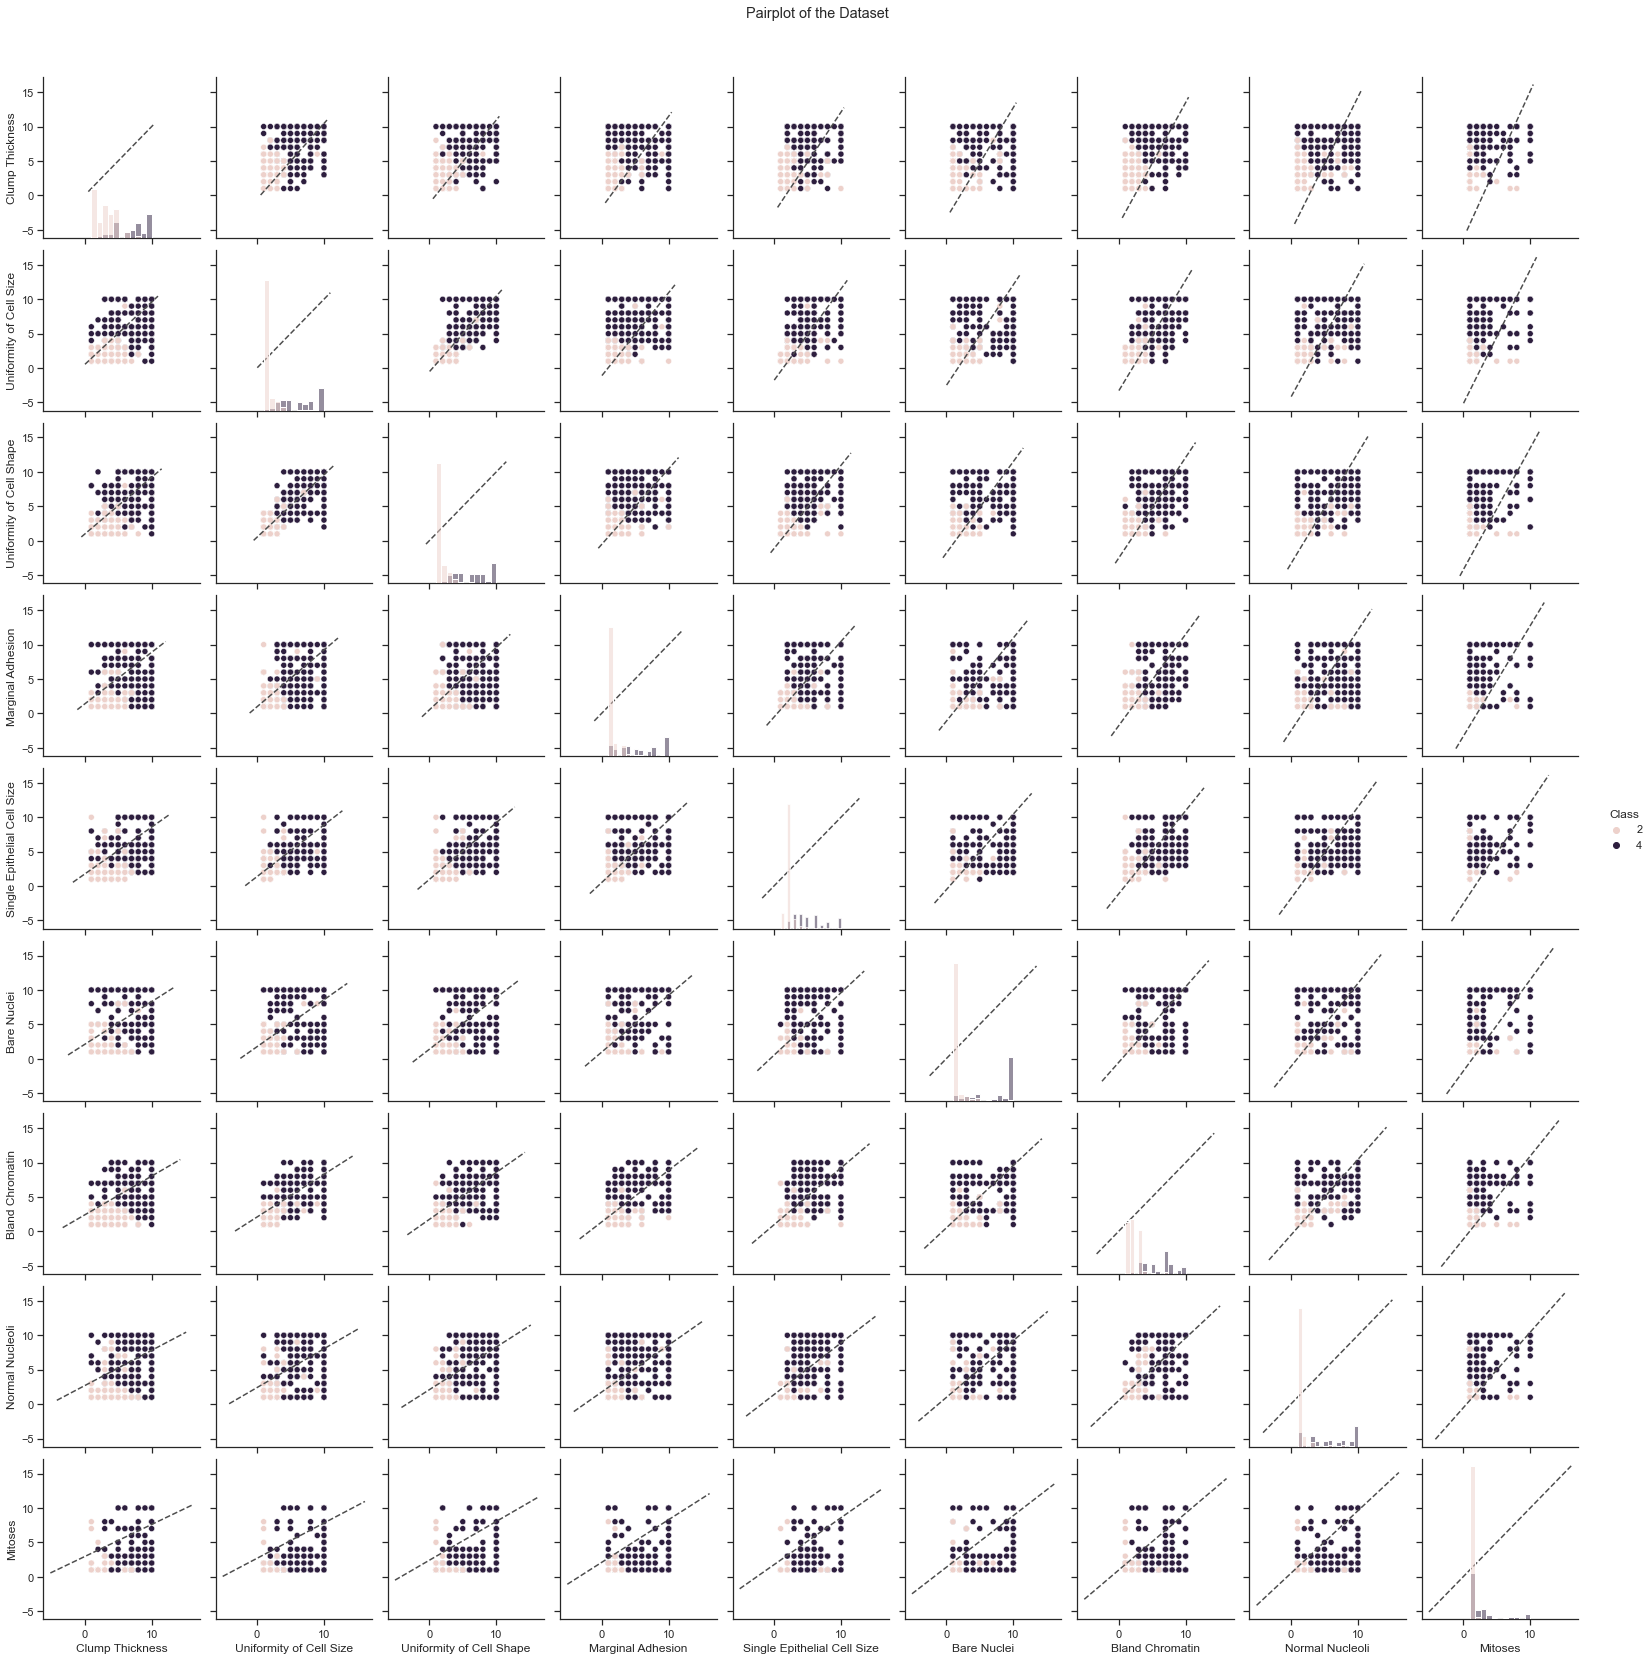

In [86]:
#Create a Pairplot of the Dataset
g = sns.pairplot(df, hue='Class', vars=df.columns[:-1], diag_kind='hist')
for ax in g.axes.flat:
    #Add a regression line to the scatter plots
    ax.plot(ax.get_xlim(),ax.get_ylim(), ls="--", c=".3")

g.fig.suptitle('Pairplot of the Dataset', y=1.03)
    

<Figure size 1080x864 with 0 Axes>

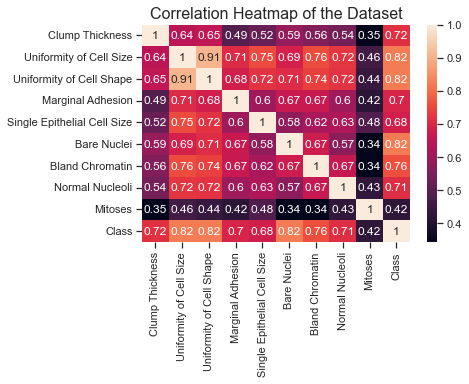

<Figure size 1080x864 with 0 Axes>

In [87]:
#Create a heatmap of the correlations between the data in the dataframe
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap of the Dataset", fontsize=16)
plt.figure(figsize=(15,12))

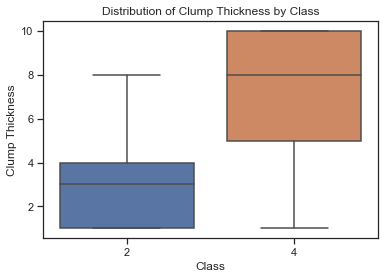

In [88]:
sns.boxplot(x="Class", y="Clump Thickness", data=df)
plt.title("Distribution of Clump Thickness by Class")
plt.show()

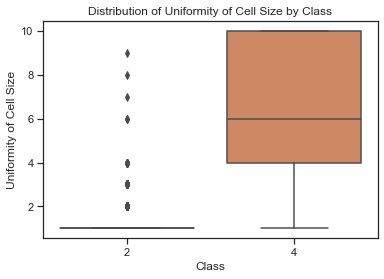

In [89]:
sns.boxplot(x="Class", y="Uniformity of Cell Size", data=df)
plt.title("Distribution of Uniformity of Cell Size by Class")
plt.show()

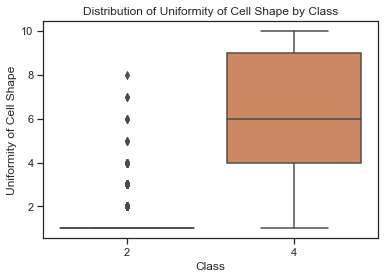

In [90]:
sns.boxplot(x="Class", y="Uniformity of Cell Shape", data=df)
plt.title("Distribution of Uniformity of Cell Shape by Class")
plt.show()

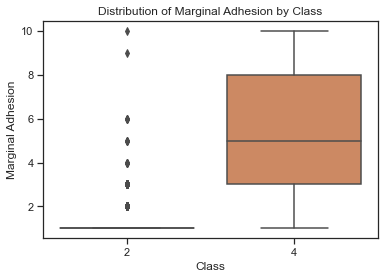

In [91]:
sns.boxplot(x="Class", y="Marginal Adhesion", data=df)
plt.title("Distribution of Marginal Adhesion by Class")
plt.show()

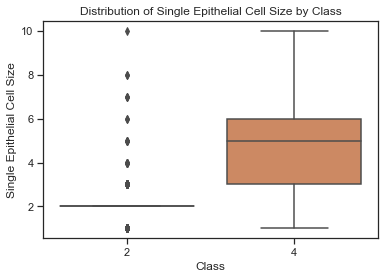

In [92]:
sns.boxplot(x="Class", y="Single Epithelial Cell Size", data=df)
plt.title("Distribution of Single Epithelial Cell Size by Class")
plt.show()

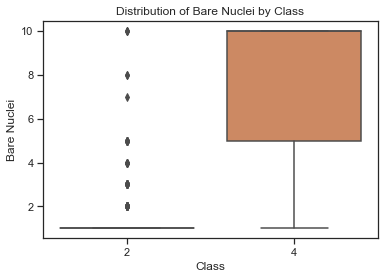

In [93]:
sns.boxplot(x="Class", y="Bare Nuclei", data=df)
plt.title("Distribution of Bare Nuclei by Class")
plt.show()

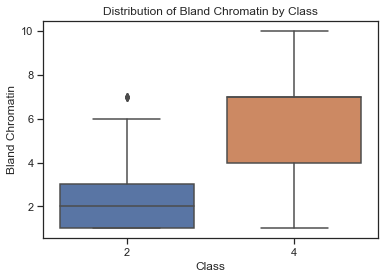

In [94]:
sns.boxplot(x="Class", y="Bland Chromatin", data=df)
plt.title("Distribution of Bland Chromatin by Class")
plt.show()

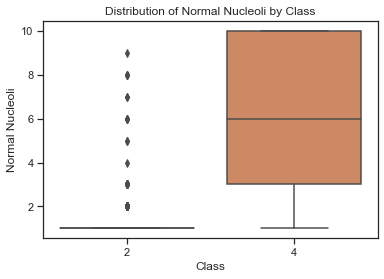

In [95]:
sns.boxplot(x="Class", y="Normal Nucleoli", data=df)
plt.title("Distribution of Normal Nucleoli by Class")
plt.show()

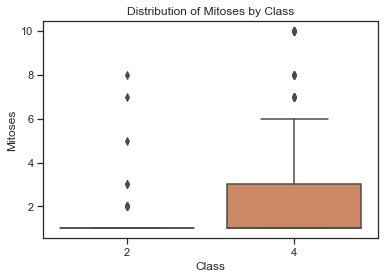

In [96]:
sns.boxplot(x="Class", y="Mitoses", data=df)
plt.title("Distribution of Mitoses by Class")
plt.show()

In [97]:
df.shape

(699, 10)

In [98]:
#Identify any outliers in the data
print(df.dtypes)

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object


<AxesSubplot:>

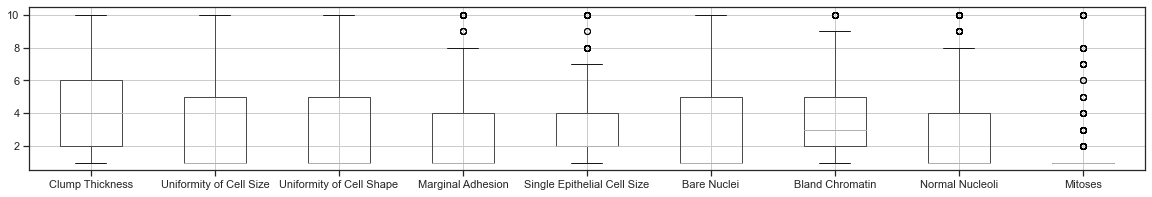

In [99]:
#Create a boxplot to visually investigate the outliers in the dataset
 
%matplotlib inline
df1['Bare Nuclei'] = pd.to_numeric(df1['Bare Nuclei'])
df1.boxplot(figsize=(20,3))


In [100]:
#Remove instances containing attributes +/- 1.5 *iqr
#Define a function to identify and replace the outliers in the dataset using the iqr method
#Calculate the iqr

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each feature:\n", outliers)

# Remove the outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the DataFrame before and after removing the outliers
print("Shape of the DataFrame after removing outliers:", df.shape)

Number of outliers in each feature:
 Clump Thickness                  0
Uniformity of Cell Size          0
Uniformity of Cell Shape         0
Marginal Adhesion               60
Single Epithelial Cell Size     54
Bare Nuclei                      0
Bland Chromatin                 20
Normal Nucleoli                 77
Mitoses                        120
Class                            0
dtype: int64
Shape of the DataFrame after removing outliers: (504, 10)


In [104]:
#Carry out feature scaling using RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
df_predictors = df.drop(['Class'], axis = 1)
x = df_predictors
y = df.Class


In [105]:
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(x,y)

for i in range(x.shape[1]):
    print('Column: %s, Selected = %s, Ranking = %d' 
          % (x.columns[i], rfe.support_[i], rfe.ranking_[i]))

Column: Clump Thickness, Selected = True, Ranking = 1
Column: Uniformity of Cell Size, Selected = False, Ranking = 3
Column: Uniformity of Cell Shape, Selected = True, Ranking = 1
Column: Marginal Adhesion, Selected = False, Ranking = 4
Column: Single Epithelial Cell Size, Selected = True, Ranking = 1
Column: Bare Nuclei, Selected = True, Ranking = 1
Column: Bland Chromatin, Selected = False, Ranking = 2
Column: Normal Nucleoli, Selected = True, Ranking = 1
Column: Mitoses, Selected = False, Ranking = 5


In [107]:
df.dtypes

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [108]:
#Splitting the dataset into training and testing sets.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
#Train the model: Once the data is preprocessed, you can train the logistic 
#regression model using scikit-learn's LogisticRegression class

from sklearn.linear_model import LogisticRegression

# Create an instance of the model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [110]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)



In [111]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           2       0.98      0.99      0.98        90
           4       0.90      0.82      0.86        11

    accuracy                           0.97       101
   macro avg       0.94      0.90      0.92       101
weighted avg       0.97      0.97      0.97       101



In [112]:
# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[89  1]
 [ 2  9]]
